Author : Russell Rupok
Department : Msc in IS student and Graduate Research Student with IDEA Lab Research Center, Athabasca University

Version: 1.0

Date: 2022/04/01 

--Project Info. 
- File No: 24697 
- Project Title: [IDEA LAB] 2022-2023 "Understanding Affordable Housing Work Roles and Representation"
- Principal Investigator: Dr. Katie MacDonald (Faculty of Humanities & Social Sciences\Centre for Interdisciplinary Studies)
- Start Date: 2022/04/01 
- Keywords: affordable housing; work; labour; representation

Background and Context: 

- Canada is in dire need of affordable housing, just over 10% of Canadian households were in “core” housing need. This means their housing needs major repairs, has insufficient bedrooms, or generally costs more than they can afford, but they cannot afford to move or can find no viable alternatives in their community. The affordable housing sector is in an exciting time of growth, but the dearth of research in this domain persists. 

Aims and Research Question(s): 

- This research project takes two of the significant challenges to the sector as sites of research. The first is workforce issues including, but not limited to, capacity, training, and retention. The second looks at representations of affordable housing in media.

- This research project will have two streams: Workforce Mapping in Affordable Housing and Understanding Responses to Affordable Housing Developments in Comparison. 

- Workforce Mapping in Affordable Housing: This stream of research asks: how are jobs in the Canadian affordable housing sector represented in job ads, and what are the key skills and abilities listed?  


Aims and Research Question(s): 

- This following model try to The represent how the Canadian Media look at our Affordable housing.
- Model represented sentiment analysis how is media's feels while purlishing their content



--Programing Languge :
- Program is written in Python . 

- Some module used in modeling : 
        # Text blob : TextBlob is a Python (2 and 3) library for processing textual data. 
                        #URL : https://textblob.readthedocs.io/en/dev/index.html
    
        # Pandas : pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
                        #URL: https://pandas.pydata.org/
            
        # re : This module provides regular expression matching operations similar to those found in Perl.
                        #URL: https://docs.python.org/3/library/re.html
            
        # nltk : NLTK is a leading platform for building Python programs to work with human language data.
                     #URL: https://www.nltk.org/
            
        # Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
                    #URL: https://seaborn.pydata.org/index.html
            
        # wordcloud: Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.
                    #URL: https://amueller.github.io/word_cloud/
        # matplotlib: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
                    #URL: https://matplotlib.org/

In [1]:
import textblob
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud,STOPWORDS
from textblob import classifiers
from textblob.classifiers import NaiveBayesClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rrupok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pwd

'C:\\Users\\rrupok\\Job Scrapping and Data Set Modeling\\Katie_AffordableHousing'

In [3]:
# uploading the data set to analyze

In [4]:
df=pd.read_excel("C:/Users/rrupok/Job Scrapping and Data Set Modeling/Katie_AffordableHousing/Articles to be Included_Year_Date.xlsx")

In [5]:
df.head() # first few rows to visulize the data is in correct format and order

,headline,month,date,year,newspaper,fulltext
0,Housing sell-off a difficult decision; Jonatha...,10,17,2011,National Post,"Goldsbie From a business perspective, and perh..."
1,City expects $15M from house sale; 22 homes on...,6,16,2011,National Post,City council voted Wednesday to sell a batch o...
2,"'We failed,'Chief admits, but hangs on; Seven ...",3,4,2011,National Post,"Before the morning meeting, his mind was made ..."
3,Resigning would set 'terrible precedent': tena...,3,4,2011,National Post,In the moments after the surprise resignation ...
4,Debating the future of the TCHC; Council to vo...,3,10,2011,National Post,Mayor Rob Ford urged city councillors to vote ...


In [6]:
df.info() # numerial values of the data set and its Data Type. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   379 non-null    object
 1   month      379 non-null    int64 
 2   date       379 non-null    int64 
 3   year       379 non-null    int64 
 4   newspaper  379 non-null    object
 5   fulltext   379 non-null    object
dtypes: int64(3), object(3)
memory usage: 17.9+ KB


In [7]:
#fulltext=df['FullText']

In [8]:
df.shape[0] # calculate how many rows of data we are working on

379

In [9]:
#using lambda function and Text Blob Module to get the polarity of the actual data 
#keeping only the comments from the actual text published on the media to get find out if the comments were acually negetive 
# or positive towards affordable housing

pol=lambda x:TextBlob(x).sentiment.polarity
sub=lambda x:TextBlob(x).sentiment.subjectivity
df['polarity']=df['fulltext'].apply(pol)
df['subjectivity']=df['fulltext'].apply(sub)
#pattern= '"(...+)"'
#text_comments=re.findall(pattern,df[FullText])
#df['t_comments']=df['FullText'].apply(re.findall(pattern,df['FullText']))
def pattern_text(text1):
    pattern= '"(...*)"'
    text_comm=" ".join(re.findall(pattern,text1))
    return text_comm

df['textcomments']=df['fulltext'].apply(lambda x:pattern_text(x))

pol1=lambda x:TextBlob(x).sentiment.polarity
df['comm_polarity']=df['textcomments'].apply(pol1)
df

#pol=lambda x:TextBlob(x).sentiment.polarity
#df['commentspolarity']=df['textcomments'].apply(pol)


,headline,month,date,year,newspaper,fulltext,polarity,subjectivity,textcomments,comm_polarity
0,Housing sell-off a difficult decision; Jonatha...,10,17,2011,National Post,"Goldsbie From a business perspective, and perh...",0.115651,0.569002,"projects"" with this goal in mind, sprinkling n...",0.100054
1,City expects $15M from house sale; 22 homes on...,6,16,2011,National Post,City council voted Wednesday to sell a batch o...,0.021883,0.497221,"If we don't deal with this right now, it's onl...",0.048933
2,"'We failed,'Chief admits, but hangs on; Seven ...",3,4,2011,National Post,"Before the morning meeting, his mind was made ...",0.070671,0.488983,I'm glad that they've resigned and we can move...,0.065495
3,Resigning would set 'terrible precedent': tena...,3,4,2011,National Post,In the moments after the surprise resignation ...,-0.008182,0.449394,"terrible precedent."" ""If someone doesn't like ...",-0.020202
4,Debating the future of the TCHC; Council to vo...,3,10,2011,National Post,Mayor Rob Ford urged city councillors to vote ...,0.075573,0.351636,"fresh start"" at the Toronto Community Housing ...",0.073930
...,...,...,...,...,...,...,...,...,...,...
374,"Yes, remnants of discriminatory urban planning...",5,25,2021,The Globe and Mail,The way we build cities reflects how we view o...,0.082813,0.380651,real estate developers had used restrictive co...,0.084039
375,Investors now buying one-fifth of Canadian hom...,6,22,2021,The Globe and Mail,Investors account for one-fifth of all home pu...,0.156306,0.414258,Determining the precise level at which investo...,0.153487
376,Best way to combat spiralling prices is to bui...,7,8,2021,The Globe and Mail,The new leader of Canada's national housing ag...,0.163898,0.378487,I do think housing is becoming a really signif...,0.149018
377,"Black, LGBTQ communities have some of the lowe...",11,23,2021,The Globe and Mail,Black Canadians and the LGBTQ population have ...,0.120735,0.425947,We know that Black and LGBTQ2+ people in Canad...,0.154167


In [10]:
#  column "polarity" represents how postive or negetive the comments were on actual raw dataset
#Subjectivity quantifies the amount of personal opinion and factual information contained in the text.

#comm_polarity represents the actual sentiment from people's comments on the text

df.head(5) 

,headline,month,date,year,newspaper,fulltext,polarity,subjectivity,textcomments,comm_polarity
0,Housing sell-off a difficult decision; Jonatha...,10,17,2011,National Post,"Goldsbie From a business perspective, and perh...",0.115651,0.569002,"projects"" with this goal in mind, sprinkling n...",0.100054
1,City expects $15M from house sale; 22 homes on...,6,16,2011,National Post,City council voted Wednesday to sell a batch o...,0.021883,0.497221,"If we don't deal with this right now, it's onl...",0.048933
2,"'We failed,'Chief admits, but hangs on; Seven ...",3,4,2011,National Post,"Before the morning meeting, his mind was made ...",0.070671,0.488983,I'm glad that they've resigned and we can move...,0.065495
3,Resigning would set 'terrible precedent': tena...,3,4,2011,National Post,In the moments after the surprise resignation ...,-0.008182,0.449394,"terrible precedent."" ""If someone doesn't like ...",-0.020202
4,Debating the future of the TCHC; Council to vo...,3,10,2011,National Post,Mayor Rob Ford urged city councillors to vote ...,0.075573,0.351636,"fresh start"" at the Toronto Community Housing ...",0.073930


In [11]:
df.sort_values('year') # short data by the year news was published 

,headline,month,date,year,newspaper,fulltext,polarity,subjectivity,textcomments,comm_polarity
0,Housing sell-off a difficult decision; Jonatha...,10,17,2011,National Post,"Goldsbie From a business perspective, and perh...",0.115651,0.569002,"projects"" with this goal in mind, sprinkling n...",0.100054
19,"More money needed for shelters, mayor tells th...",10,31,2011,The Globe and Mail,Mayor Gregor Robertson acknowledges the number...,0.214286,0.319048,"And, this year, for the first time in over a d...",0.125000
20,Wellesley fire certified as class-action; $80M...,7,20,2011,National Post,A judge has certified an $80-million class-act...,0.131331,0.405465,The defendants have treated the plaintiff and ...,0.109524
21,Ryerson student gets a say in reshaping social...,6,1,2011,The Globe and Mail,Munira Abukar figures much of her young life h...,0.036567,0.406639,I think growing up in Toronto community housin...,0.051690
22,Gutted funding,8,17,2011,The Globe and Mail,Re Unhooding The Hoodlums (Aug. 15): While the...,0.013782,0.325641,billions of pounds have been spent in Britain ...,-0.001042
...,...,...,...,...,...,...,...,...,...,...
351,Finessing the financials key to Parkdale land ...,5,21,2021,The Globe and Mail,"Up until mid-April, residents at 22 Maynard Av...",0.067063,0.351515,When you take the element of fear of a bad lan...,0.065648
352,An innovative approach to affordability,2,20,2021,The Globe and Mail,"For the first time in decades, a significant n...",0.075708,0.456297,"The private sector is building market rental, ...",0.030511
353,Toronto's affordable rental plans take the lon...,7,23,2021,The Globe and Mail,As Toronto's City Council debates new measures...,0.107813,0.424717,I wouldn't pick up the phone for 10 affordable...,0.135281
343,Port Moody housing plan faces concerns,7,20,2021,The Globe and Mail,A development in the small but booming suburb ...,0.042686,0.452836,Woodland is an example of the challenge that i...,0.051579


In [13]:
post_year=df.groupby('year') # data set is grouped based on the yead
post_year.describe().head(20)

month                                                   date             \
     count      mean       std  min  25%   50%    75%   max count       mean   
year                                                                           
2011  34.0  5.352941  3.003860  1.0  3.0   4.5   7.00  12.0  34.0  13.676471   
2012  32.0  6.218750  3.087272  1.0  3.0   6.5   9.00  11.0  32.0  18.437500   
2013  17.0  6.705882  2.974153  2.0  5.0   6.0   9.00  12.0  17.0  17.352941   
2014  12.0  7.833333  4.018895  1.0  3.0  10.0  10.25  12.0  12.0  17.250000   
2015  25.0  6.920000  3.239341  1.0  4.0   7.0  10.00  12.0  25.0  16.000000   
2016  44.0  5.750000  3.103824  1.0  3.0   6.0   8.00  11.0  44.0  17.545455   
2017  47.0  6.042553  3.042864  1.0  4.0   5.0   8.00  12.0  47.0  18.510638   
2018  43.0  6.534884  3.411108  1.0  3.0   6.0   9.50  12.0  43.0  19.093023   
2019  51.0  6.980392  3.042960  1.0  5.0   7.0   9.00  12.0  51.0  15.274510   
2020  29.0  7.482759  3.969713  1.0  5.0   8.0  11.00  12.0  29.0  17.620690   
2021  45.0  7.044444  3.140321  1.0  5.0   7.0   9.00  12.0  45.0  16.066667   

      ... subjectivity           comm_polarity                                \
      ...          75%       max         count      mean       std       min   
year  ...                                                                      
2011  ...     0.464487  0.569002          34.0  0.089477  0.105612 -0.100000   
2012  ...     0.472253  0.550926          32.0  0.076157  0.104307 -0.188889   
2013  ...     0.443068  0.501662          17.0  0.071836  0.074377 -0.021159   
2014  ...     0.466349  0.544248          12.0  0.084167  0.135249 -0.300000   
2015  ...     0.449803  0.579214          25.0  0.106633  0.119234 -0.049083   
2016  ...     0.453632  0.578571          44.0  0.099105  0.063532  0.000000   
2017  ...     0.442765  0.570672          47.0  0.113076  0.082857  0.000000   
2018  ...     0.451488  0.542842          43.0  0.120471  0.081272  0.000000   
2019  ...     0.453109  0.540200          51.0  0.079646  0.076403 -0.014178   
2020  ...     0.447972  0.519792          29.0  0.069202  0.065621 -0.020989   
2021  ...     0.454933  0.518407          45.0  0.097427  0.062157 -0.062186   

                                              
           25%       50%       75%       max  
year                                          
2011  0.027953  0.073303  0.127542  0.507143  
2012  0.000000  0.066199  0.135036  0.356566  
2013  0.000000  0.087768  0.129517  0.224897  
2014  0.059826  0.117295  0.171293  0.197619  
2015  0.019242  0.098214  0.144942  0.550000  
2016  0.054785  0.109716  0.141363  0.220379  
2017  0.061692  0.117667  0.148604  0.350000  
2018  0.079317  0.108012  0.155819  0.416667  
2019  0.000000  0.074730  0.124805  0.353409  
2020  0.000000  0.066891  0.105146  0.254649  
2021  0.065648  0.105438  0.135708  0.231588  

[11 rows x 40 columns]

In [14]:
#df['no_punctuation'] = df['textcomments'].apply (lambda x:remove_punctuation(x))
#df.head()

In [15]:
df.to_excel('Sample TextNComments_SentimentAnalysis_Katie_MC.xlsx')

In [16]:
# converting the positive , negative and neutral sentiment from numbers to wording format so its easily readble

df['sentiment']=np.select([df['comm_polarity'] > 0, df['comm_polarity'] == 0], ["positive", "neutral"], "negative")

In [17]:
df.head(5)

,headline,month,date,year,newspaper,fulltext,polarity,subjectivity,textcomments,comm_polarity,sentiment
0,Housing sell-off a difficult decision; Jonatha...,10,17,2011,National Post,"Goldsbie From a business perspective, and perh...",0.115651,0.569002,"projects"" with this goal in mind, sprinkling n...",0.100054,positive
1,City expects $15M from house sale; 22 homes on...,6,16,2011,National Post,City council voted Wednesday to sell a batch o...,0.021883,0.497221,"If we don't deal with this right now, it's onl...",0.048933,positive
2,"'We failed,'Chief admits, but hangs on; Seven ...",3,4,2011,National Post,"Before the morning meeting, his mind was made ...",0.070671,0.488983,I'm glad that they've resigned and we can move...,0.065495,positive
3,Resigning would set 'terrible precedent': tena...,3,4,2011,National Post,In the moments after the surprise resignation ...,-0.008182,0.449394,"terrible precedent."" ""If someone doesn't like ...",-0.020202,negative
4,Debating the future of the TCHC; Council to vo...,3,10,2011,National Post,Mayor Rob Ford urged city councillors to vote ...,0.075573,0.351636,"fresh start"" at the Toronto Community Housing ...",0.073930,positive


In [18]:
df.describe() # statistical presentation of the numerial column in the data set

,month,date,year,polarity,subjectivity,comm_polarity
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,6.517150,16.973615,2016.604222,0.100201,0.423193,0.094155
std,3.250006,8.635741,3.135660,0.057417,0.056301,0.085868
min,1.000000,1.000000,2011.000000,-0.158333,0.000000,-0.300000
25%,4.000000,10.000000,2014.500000,0.066569,0.394930,0.033670
50%,7.000000,18.000000,2017.000000,0.098385,0.422818,0.095697
75%,9.000000,24.000000,2019.000000,0.131345,0.456497,0.136181
max,12.000000,31.000000,2021.000000,0.308556,0.579214,0.550000


matplotlib.axes._subplots.AxesSubplot

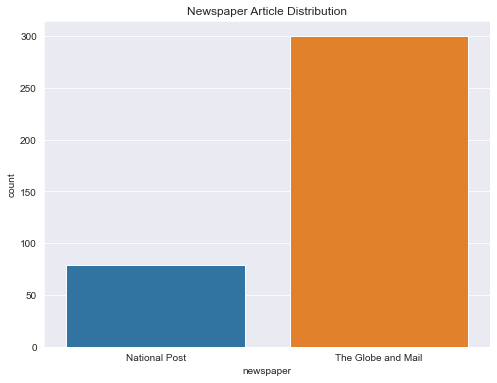

In [19]:
#Countplot : Show the counts of observations in each categorical bin using bars.

sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
#articlecount=df.newspaper.value_counts()
countplt=sns.countplot(data=df,x=df.newspaper)


plt.title("Newspaper Article Distribution")
type(countplt)


matplotlib.axes._subplots.AxesSubplot

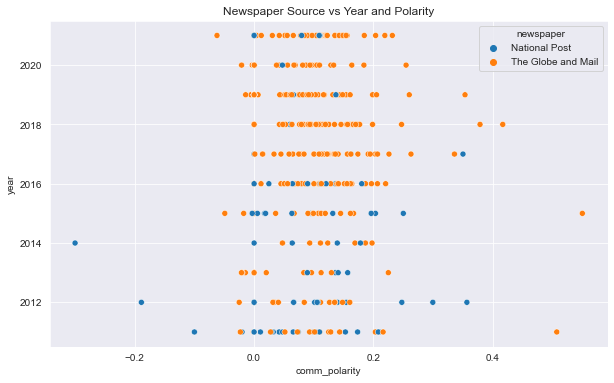

In [79]:
# make a chart where the Y axis is year and the X axis shows polarity, 
# and color code the X axis by newspaper source?

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sctterplt_newssource_year_polarity=sns.scatterplot(data=df,
                    y='year',
                    x='comm_polarity',
                    hue='newspaper')

plt.title("Newspaper Source vs Year and Polarity")
type(sctterplt_newssource_year_polarity)
#sns.move_legend(sctterplt_newssource_year_polarity,"lower right",bbox_to_anchor=(1,1))

In [64]:
#'''sns.set_style('darkgrid')
#plt.figure(figsize=(14,8))
#relplot=sns.pairplot(data=df,
                    #x_vars=['year','newspaper','sentiment'],
                    #y_vars=['year','newspaper','sentiment'] )'''

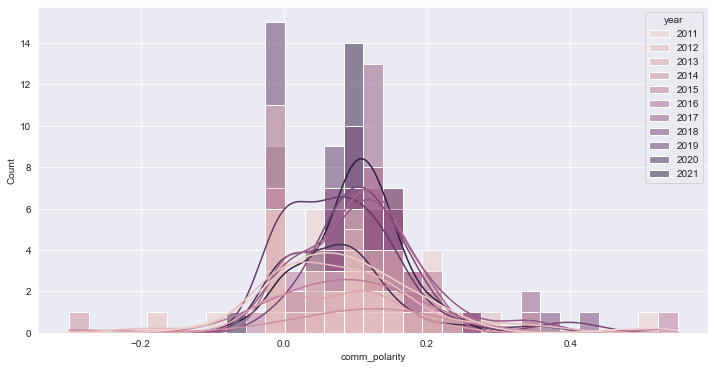

In [39]:
#A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.
#kde: If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s).
#cumulative:If True, plot the cumulative counts(add up the values as you go) as bins increase.

sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
histplt=sns.histplot(df, x=df.comm_polarity,hue=df.year,stat='count',kde=True,cumulative=False)
plt.show(histplt)
#plt.title("Newspaper Article Distribution")
type(histplt)
sns.move_legend(histplt,"lower right",bbox_to_anchor=(1,1))

In [40]:
#A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.
#kde: If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s).
#cumulative:If True, plot the cumulative counts(add up the values as you go) as bins increase.

#Observation: 

matplotlib.text.Text

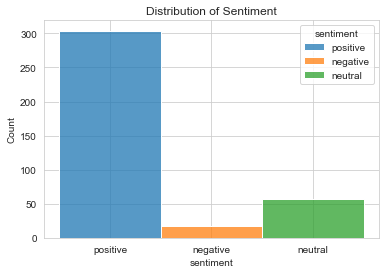

In [41]:
sns.set_style("whitegrid")
histplt=sns.histplot(data=df,
             x='sentiment',
             hue='sentiment',
             multiple='stack')
histplt=plt.title('Distribution of Sentiment')
type(histplt)

seaborn.axisgrid.FacetGrid

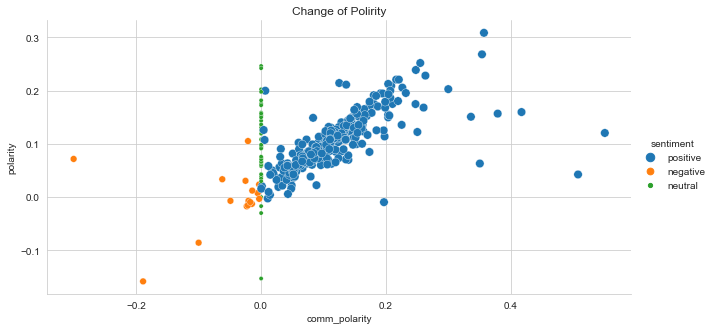

In [42]:
relplt=sns.relplot(x='comm_polarity',
            y='polarity',
            hue='sentiment',
            size='sentiment',
            height=4.5,
            aspect=2,
            data=df)
relplot=plt.title("Change of Polirity")
type(relplt)

Observation:
    
-We see majority of the polarirty score in between 0.1-0.2. 
So ,we can say we had a mix of polarity meaning negative and positive in actual cotext

- We get the polarity score calculating each sentense polarity and averaging them with the total number of sentenses on that post. 
- Return the polarity score as a float within the range [-1.0, 1.0] - This also tells us there were mixer of negetive and positive emotion on each post.

In [43]:
#displot=sns.displot(data=df,x=df.comm_polarity,y=df.polarity,col=df.sentiment,kind='kde')

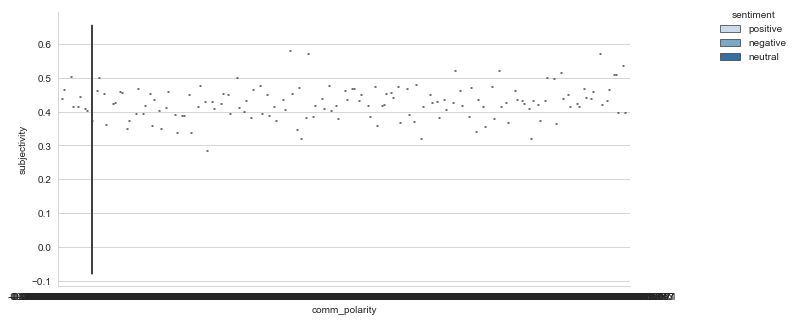

In [44]:
sns.set_style("whitegrid")
catplt=sns.catplot(data=df, x="comm_polarity", 
            y="subjectivity", 
            hue='sentiment',
            kind="violin",
            inner="stick",
            palette="Blues",
            height=4.50,
            aspect=2
            #kind='swarm'
           )
#catplt=plt.title("Sentiment Range Distribution")

type(catplt)
sns.move_legend(catplt,"upper left",bbox_to_anchor=(1,1))

Observation:
    
    - This catagorial plot is to reprsent if there is any relationship between the polarity and sentenses were used in actual news
    - Subjectivity was inbetween 0.4-0.5 compare to polarity , that means most of the comments was some how subjective and in the middle
    - The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

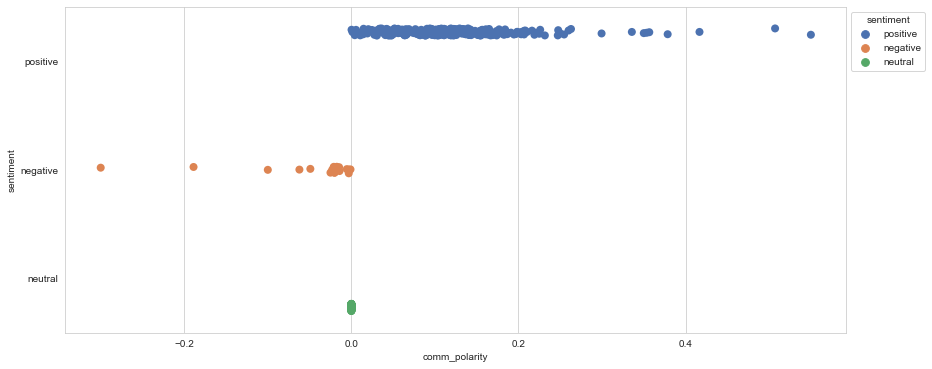

In [45]:
plt.figure(figsize=(14,6))
stripplt=sns.stripplot(data=df, y='sentiment',x="comm_polarity",hue='sentiment',palette="deep",dodge=True,size=8)
#boxplt=sns.boxplot(data=df, y='sentiment',x="comm_polarity",palette="deep")
type(stripplt)
sns.move_legend(stripplt,"upper left",bbox_to_anchor=(1,1))

Objective :
    
    - Another way of looking how polarity is distributed in whole corpus
    - We have few neutral sentiment, some out lier in both the positive and negative sentiment 
    - Mostly sentiments range from -0.2 till 0.2 with ourout out liers

NLP Analysis and Model Creation. NLP analysis and model will be based on student convesation on each semester. 
Column "textcomments" is the primary column that wil be part of the analysis

In [46]:
df.head(5)

,headline,month,date,year,newspaper,fulltext,polarity,subjectivity,textcomments,comm_polarity,sentiment,textcomments_lower,textcomments_nopunc
0,Housing sell-off a difficult decision; Jonatha...,10,17,2011,National Post,"Goldsbie From a business perspective, and perh...",0.115651,0.569002,"projects"" with this goal in mind, sprinkling n...",0.100054,positive,"projects"" with this goal in mind, sprinkling n...",projects with this goal in mind sprinkling new...
1,City expects $15M from house sale; 22 homes on...,6,16,2011,National Post,City council voted Wednesday to sell a batch o...,0.021883,0.497221,"If we don't deal with this right now, it's onl...",0.048933,positive,"if we don't deal with this right now, it's onl...",if we dont deal with this right now its only g...
2,"'We failed,'Chief admits, but hangs on; Seven ...",3,4,2011,National Post,"Before the morning meeting, his mind was made ...",0.070671,0.488983,I'm glad that they've resigned and we can move...,0.065495,positive,i'm glad that they've resigned and we can move...,im glad that theyve resigned and we can move f...
3,Resigning would set 'terrible precedent': tena...,3,4,2011,National Post,In the moments after the surprise resignation ...,-0.008182,0.449394,"terrible precedent."" ""If someone doesn't like ...",-0.020202,negative,"terrible precedent."" ""if someone doesn't like ...",terrible precedent if someone doesnt like what...
4,Debating the future of the TCHC; Council to vo...,3,10,2011,National Post,Mayor Rob Ford urged city councillors to vote ...,0.075573,0.351636,"fresh start"" at the Toronto Community Housing ...",0.073930,positive,"fresh start"" at the toronto community housing ...",fresh start at the toronto community housing c...


In [47]:
df.isnull() # checking if there is any num value in the data set so I can drop

,headline,month,date,year,newspaper,fulltext,polarity,subjectivity,textcomments,comm_polarity,sentiment,textcomments_lower,textcomments_nopunc
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,False,False,False,False,False,False,False,False,False,False,False,False,False
375,False,False,False,False,False,False,False,False,False,False,False,False,False
376,False,False,False,False,False,False,False,False,False,False,False,False,False
377,False,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
def lowertext(text):
    lower_case=(text.lower())
    return lower_case

df['textcomments_lower']=df['textcomments'].apply(lambda x:lowertext(x))
df.head(5)

,headline,month,date,year,newspaper,fulltext,polarity,subjectivity,textcomments,comm_polarity,sentiment,textcomments_lower,textcomments_nopunc
0,Housing sell-off a difficult decision; Jonatha...,10,17,2011,National Post,"Goldsbie From a business perspective, and perh...",0.115651,0.569002,"projects"" with this goal in mind, sprinkling n...",0.100054,positive,"projects"" with this goal in mind, sprinkling n...",projects with this goal in mind sprinkling new...
1,City expects $15M from house sale; 22 homes on...,6,16,2011,National Post,City council voted Wednesday to sell a batch o...,0.021883,0.497221,"If we don't deal with this right now, it's onl...",0.048933,positive,"if we don't deal with this right now, it's onl...",if we dont deal with this right now its only g...
2,"'We failed,'Chief admits, but hangs on; Seven ...",3,4,2011,National Post,"Before the morning meeting, his mind was made ...",0.070671,0.488983,I'm glad that they've resigned and we can move...,0.065495,positive,i'm glad that they've resigned and we can move...,im glad that theyve resigned and we can move f...
3,Resigning would set 'terrible precedent': tena...,3,4,2011,National Post,In the moments after the surprise resignation ...,-0.008182,0.449394,"terrible precedent."" ""If someone doesn't like ...",-0.020202,negative,"terrible precedent."" ""if someone doesn't like ...",terrible precedent if someone doesnt like what...
4,Debating the future of the TCHC; Council to vo...,3,10,2011,National Post,Mayor Rob Ford urged city councillors to vote ...,0.075573,0.351636,"fresh start"" at the Toronto Community Housing ...",0.073930,positive,"fresh start"" at the toronto community housing ...",fresh start at the toronto community housing c...


In [49]:
dir(string)

['Formatter',
 'Template',
 '_ChainMap',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_re',
 '_sentinel_dict',
 '_string',
 'ascii_letters',
 'ascii_lowercase',
 'ascii_uppercase',
 'capwords',
 'digits',
 'hexdigits',
 'octdigits',
 'printable',
 'punctuation',
 'whitespace']

#Removing punctuation so we can go back to to the original( dictionary) format of the text and work.

In [50]:
def remove_punctuation(txt):
    text_nopunt="".join([c for c in txt if c not in string.punctuation])
    return text_nopunt
df["textcomments_nopunc"]=df["textcomments_lower"].apply(lambda x:remove_punctuation(x))
df.head(5)

,headline,month,date,year,newspaper,fulltext,polarity,subjectivity,textcomments,comm_polarity,sentiment,textcomments_lower,textcomments_nopunc
0,Housing sell-off a difficult decision; Jonatha...,10,17,2011,National Post,"Goldsbie From a business perspective, and perh...",0.115651,0.569002,"projects"" with this goal in mind, sprinkling n...",0.100054,positive,"projects"" with this goal in mind, sprinkling n...",projects with this goal in mind sprinkling new...
1,City expects $15M from house sale; 22 homes on...,6,16,2011,National Post,City council voted Wednesday to sell a batch o...,0.021883,0.497221,"If we don't deal with this right now, it's onl...",0.048933,positive,"if we don't deal with this right now, it's onl...",if we dont deal with this right now its only g...
2,"'We failed,'Chief admits, but hangs on; Seven ...",3,4,2011,National Post,"Before the morning meeting, his mind was made ...",0.070671,0.488983,I'm glad that they've resigned and we can move...,0.065495,positive,i'm glad that they've resigned and we can move...,im glad that theyve resigned and we can move f...
3,Resigning would set 'terrible precedent': tena...,3,4,2011,National Post,In the moments after the surprise resignation ...,-0.008182,0.449394,"terrible precedent."" ""If someone doesn't like ...",-0.020202,negative,"terrible precedent."" ""if someone doesn't like ...",terrible precedent if someone doesnt like what...
4,Debating the future of the TCHC; Council to vo...,3,10,2011,National Post,Mayor Rob Ford urged city councillors to vote ...,0.075573,0.351636,"fresh start"" at the Toronto Community Housing ...",0.073930,positive,"fresh start"" at the toronto community housing ...",fresh start at the toronto community housing c...


In [51]:
df.to_excel('Newsarticle_modified.xlsx') # exporting the file to see the actual content based on the modeling so far

In [52]:
stop_words = stopwords.words('english')
new_stopwords = ["say", "would", "another", "also","said" ,
                 "daily","says","could","see","much",
                 "thats","even","mr","going","get"]
stop_words.extend(new_stopwords)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

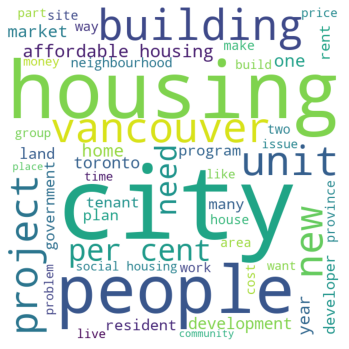

In [53]:
text="".join(df['textcomments_nopunc'])
#wordcloud = WordCloud(stopwords=nltk.corpus.stopwords.words('english'),height=600,width=600,max_words=100, background_color="white").generate(text)
wordcloud = WordCloud(stopwords=stop_words,height=600,width=600,max_words=50, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[6,8])
plt.imshow(wordcloud, interpolation='kaiser')
plt.axis("off")
plt.show()

Observation : 
    - A program  ran to identyfy the most imporatnt words . 
      Any word with bigger font means most number occurences this has in the whole corpus.
    - This program were run removing any stop words ( i.e. i, me , you etc) 
      from each conversation, NLTK is used and this tool kit has 153 stop word in total
      
    - Fist 8 most imporant words were in the new including " City", 'People','Housing', 'Affordable Housing', 'New Unit',"Vancouver", " project", "Building"

In [54]:
training=[('It’s been quite the week, but our home and our family are safe.','pos'),
          ('I love this sandwich.','pos'),
          ('This is an amazing place!','pos'),
          ('I do not like this restaurant','neg'),
          ('I love this sandwich.','pos'),
          ('I am not thrilled at the prospect of doing several hours of online learning with my 6 & 7 year old each evening','neg'),
          ('I am obligated to report to work so the time constraints of trying to complete what the school is sending home to complete online is just not feasible','pos'),
          ('Accessibility can be a challenge for learners in this new digital age. ','pos'),
          ('Thanks for raising this. I’ll be posting about this Sunday morning.','pos'),
          ('The conversation around OER has been around its success despite the challenges that students face when they are learning at a distance.','pos'),
          ('I believe an area that would benefit from more research is teacher training to operate in an online environment','pos'),
          ('It was just a matter of time that distance learning was to be part of our lives. It came quickly due to the pandemic and there was a sudden shift especially with schools. However, it can be implied that we can use blended learning for our systems as well as equip our teachers with the skills needed to use online technology to enhance learning process for students. ','neg'),
          ('Wes Anderson is my favorite director!','neg'),
          ('Captain America 2 is pretty awesome.','neg'),
          ('Fantastic Mr Fox is an awesome film!','neg'),

]

testing = [
('For the first part it would be good to know how distance learning can be implemented and where it has been implement. ','pos'),
("He ain't from around here.", 'neg'),
('OER was originally implemented in a hybrid fashion, meaning the integrity of the original course was intact, but used OER to fully exploit its advantages.','pos')
]

In [55]:
classifier = classifiers.NaiveBayesClassifier(training)
print(classifier.accuracy(testing))
classifier.show_informative_features(4)

0.6666666666666666
Most Informative Features
      contains(learning) = True              neg : pos    =      2.4 : 1.0
           contains(not) = True              neg : pos    =      2.4 : 1.0
            contains(of) = True              neg : pos    =      2.4 : 1.0
          contains(this) = True              pos : neg    =      2.1 : 1.0


In [56]:
blob=TextBlob('''I appreciate you highlighting that post-pandemic, pre-service teachers will require training in online teaching and learning, regardless if they hope to be in a classroom full time. '''
              ,classifier=classifier)
blob.classify()

'pos'